<a href="https://colab.research.google.com/github/ThuyLTN/Test/blob/master/TIKI_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ASSIGNMENT FOR “AI ENGINEER” POSITION



Create a data set with 100 points from two mixed Gaussian distributions (each
distribution has five two Gaussian distributions). The elements of the first mixed
distribution have a maximum average value of 0 and a minimum average of -1
and a variance of 1. The elements of the second mixed distribution have a dark
mean value. multi is 1., the minimum average is 0 and the variance is 1. Draw
decision boundary between 100 points of the first mixture distribution and 100
points of the second mixture distribution don't need to train any machine learning
models.

Tạo ra một tập dữ liệu gồm 100 điểm từ 2 phân phối Mixure Gaussian (mỗi cái với
5 thành phần Gaussian distribution cho 2 biến). Các thành phần của phân phối
Mixure Gaussian thứ nhất có mean lớn nhất là 0., bé nhất là -1., và có variance=1.
Các thành phần của phân phối Mixure Gaussian thứ hai có mean lớn nhất là 1., bé
nhất là 0., và có variance=1. Plot các điểm dữ liệu lên mặt phẳng hai chiều, vẽ
ranh giới Bayes (Bayes Boundary) trên mặt phẳng để phân biệt 100 điểm của
phân phối thứ nhất với 100 điểm của phân phối thứ hai.

In [0]:
import numpy as np
import seaborn
import scipy
import matplotlib.pyplot as plt

In [0]:
def Random_Mixed_MultiGaussian(min_mean, max_mean, variance, n_component, size = 100):
  
  means_x = np.random.uniform(low = min_mean, high = max_mean, size=(n_component,))
  means_y = np.random.uniform(low = min_mean, high = max_mean, size=(n_component,))
  
  cov = [[variance,0],[0,variance]]
  
  mix_mulG = np.zeros((size,2))
  
  for i in range(n_component):
    mix_mulG[i*20:i*20+20,:] = np.random.multivariate_normal([means_x[i], means_y[i]], cov, 20)
    
  return mix_mulG, means_x, means_y

Hàm tính Bayes boundary

In [0]:
def f(x,mean_1, mean_2):
  vt = mean_1[0]**2 + mean_1[1]**2 - mean_2[0]**2 - mean_2[1]**2
  vt = vt/2
  f = (vt - (mean_1[0]-mean_2[0])*x)/(mean_1[1]-mean_2[1])
  return f

Gọi hàm random tạo bộ dữ liệu từ 2 bộ Mixed Gaussian 2 biến

In [0]:
mixedG_1, means_x1, means_y1 = Random_Mixed_MultiGaussian(-1, 0, 1, 5)
mixedG_2, means_x2, means_y2 = Random_Mixed_MultiGaussian(0, 1, 1, 5)

In [0]:
x = np.random.uniform(low = mixedG_1.min(), high = mixedG_2.max(), size = (100,))
me_1 = mixedG_1.mean(axis=0)
me_2 = mixedG_2.mean(axis=0)

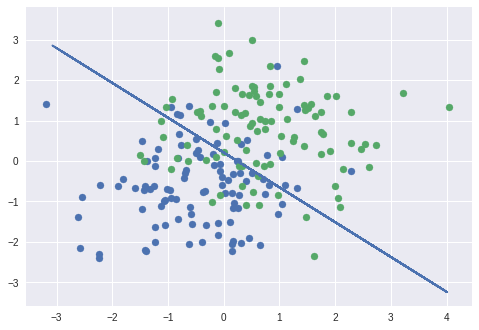

In [14]:
m = mixedG_1.T
m2 = mixedG_2.T
plt.scatter(m[0],m[1])
plt.scatter(m2[0],m2[1])
plt.plot(x, f(x,me_1, me_2))